<a href="https://colab.research.google.com/github/nylah0505/nwitter/blob/master/5%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
x = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
# SingleLayer 실습
class SingleLayer:

    def __init__(self):
        self.w = None  # 가중치를 초기화합니다.
        self.b = None  # 절편을 초기화합니다.
        self.losses = []  # 손실을 저장할 리스트를 초기화합니다.

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다.
        self.b = 0  # 절편을 초기화합니다.
        for i in range(epochs):  # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:  # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])  # 정방향 계산
                a = self.activation(z)  # 활성화 함수 적용
                err = -(y[i] - a)  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad  # 가중치 업데이트
                self.b -= b_grad  # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        return np.array(z) > 0  # 스텝 함수 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y)


In [5]:
layer = SingleLayer()
layer.fit(x_train_all, y_train_all)
layer.score(x_test, y_test)

0.7105263157894737

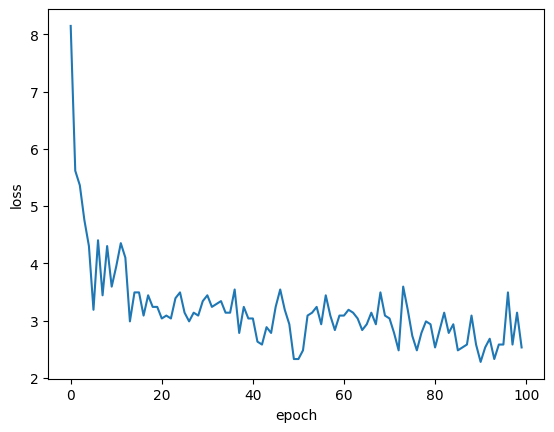

In [6]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [9]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [10]:
# 위의 예측값과 정답과 비교
print(y_test[0:10])

[0 1 0 1 0 1 1 0 0 0]


In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [16]:
# SingleLayer1 실습
class SingleLayer1:

    def __init__(self, learning_rate = 0.1):
        self.w = None  # 가중치를 초기화합니다.
        self.b = None  # 절편을 초기화합니다.
        self.losses = []  # 손실을 저장할 리스트를 초기화합니다.
        self.w_history=[]
        self.lr= learning_rate

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
        return z

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])  # 가중치를 초기화합니다.
        self.b = 0  # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())
        np.random.seed(42)

        for i in range(epochs):  # epochs만큼 반복합니다
            loss = 0
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:  # 모든 샘플에 대해 반복합니다
                z = self.forpass(x[i])  # 정방향 계산
                a = self.activation(z)  # 활성화 함수 적용
                err = -(y[i] - a)  # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad  # 가중치 업데이트
                self.b -= b_grad  # 절편 업데이트

                self.w_history.append(self.w.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
        return np.array(z) > 0  # 스텝 함수 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [17]:
layer1 = SingleLayer1()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.9120879120879121

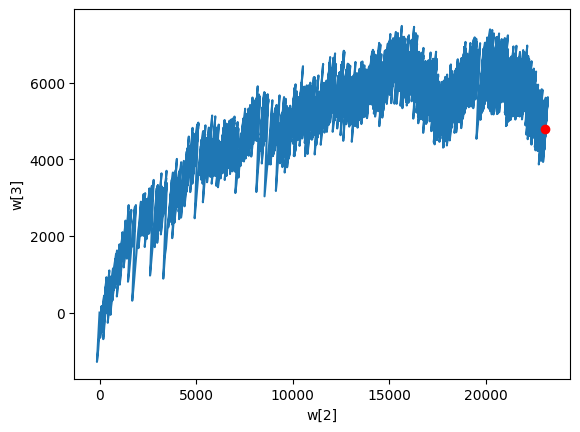

In [18]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [19]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std
print(x_train)
print(x_train_scaled)

[[1.480e+01 1.766e+01 9.588e+01 ... 8.308e-02 3.600e-01 7.285e-02]
 [1.174e+01 1.402e+01 7.424e+01 ... 8.290e-02 3.101e-01 6.688e-02]
 [1.471e+01 2.159e+01 9.555e+01 ... 1.834e-01 3.698e-01 1.094e-01]
 ...
 [1.444e+01 1.518e+01 9.397e+01 ... 1.599e-01 2.691e-01 7.683e-02]
 [1.742e+01 2.556e+01 1.145e+02 ... 1.099e-01 1.603e-01 6.818e-02]
 [1.143e+01 1.731e+01 7.366e+01 ... 6.402e-02 2.584e-01 8.096e-02]]
[[ 0.21529445 -0.3313719   0.17983103 ... -0.48870759  1.0446075
  -0.6393202 ]
 [-0.6557398  -1.14919128 -0.71043609 ... -0.49139007  0.27379602
  -0.9632616 ]
 [ 0.18967579  0.55160342  0.16625487 ...  1.00632788  1.19598931
   1.3439391 ]
 ...
 [ 0.11281983 -0.88856752  0.10125385 ...  0.65611522 -0.35953605
  -0.42335927]
 [ 0.96108195  1.44356576  0.94585569 ... -0.08901809 -2.0401831
  -0.8927216 ]
 [-0.74398184 -0.41000838 -0.73429722 ... -0.77275241 -0.52482027
  -0.19925911]]


In [20]:
layer2 = SingleLayer1()
layer2.fit(x_train_scaled, y_train)

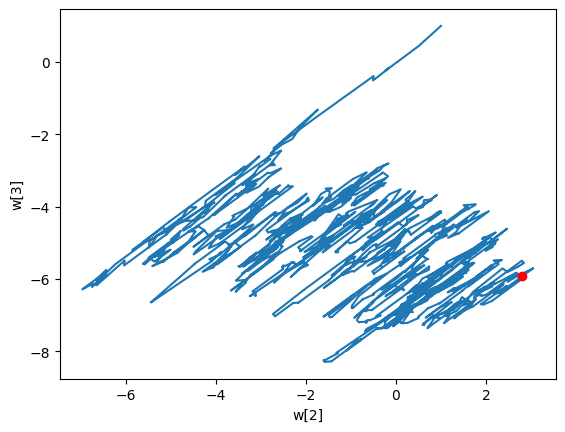

In [21]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
# 검증 세트 전처리

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

In [ ]:
# 모델 성능평가

layer2.score(x_val_scaled, y_val)

0.967032967032967

# 훈련 세트와 검증 세트가 다른 비율로 스케일이 조정된 경우

* 데이터를 50개씩 뽑아 산점도를 그리고 비교함

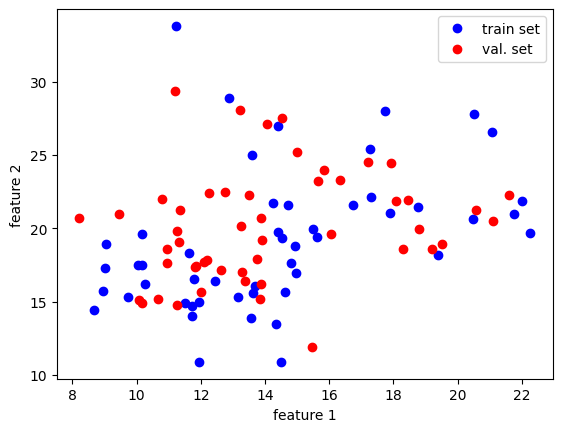

In [ ]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

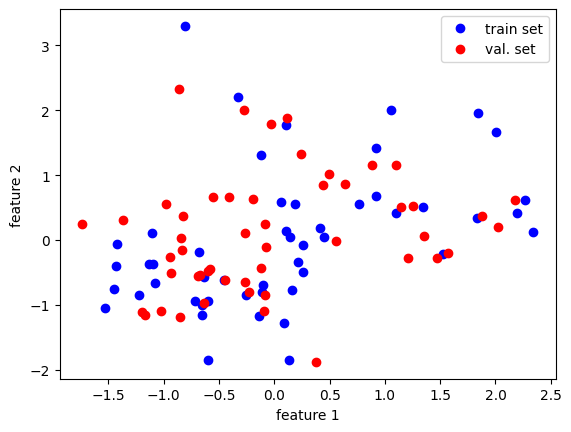

In [ ]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

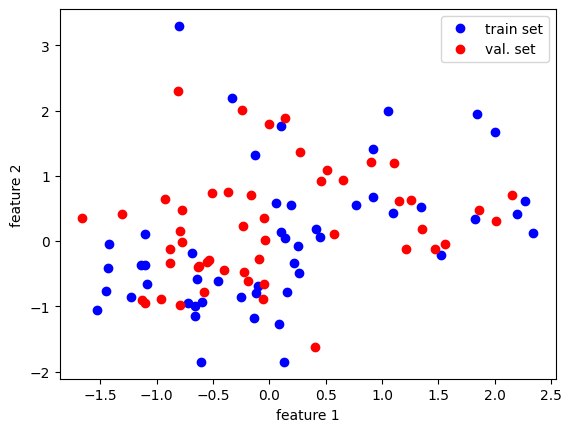

In [26]:
# 학습용 세트의 평균과 표준편차를 검증 세트에 적용

x_val_scaled = (x_val - train_mean) / train_std

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [27]:
layer2.score(x_val_scaled, y_val)

0.967032967032967

# 과대적합 과소적합

In [ ]:
# SingleLayer2 실습

In [23]:
layer3 = SingleLayer2()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

NameError: name 'SingleLayer2' is not defined

NameError: name 'layer3' is not defined

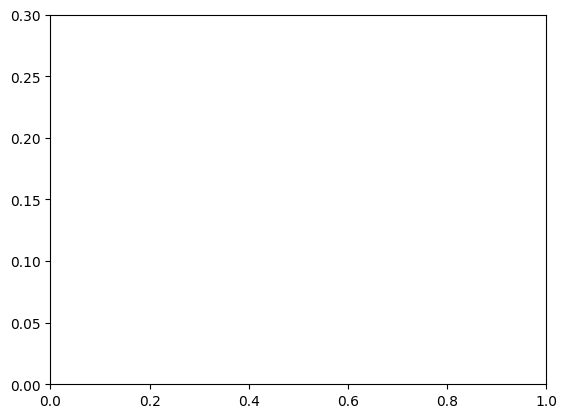

In [22]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
# 훈련 조기 종료

layer4 = SingleLayer2()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

# 규제

In [ ]:
# SingleLayer3 실습

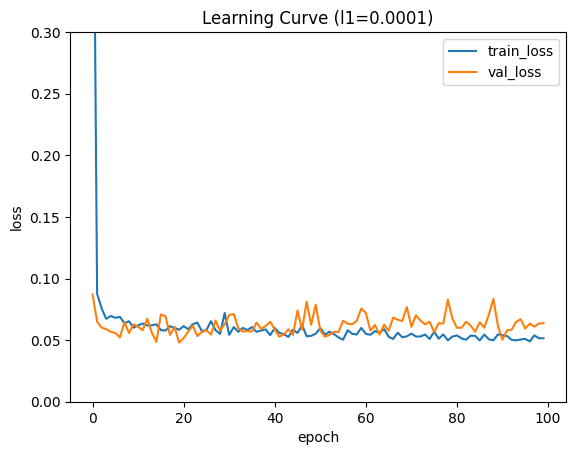

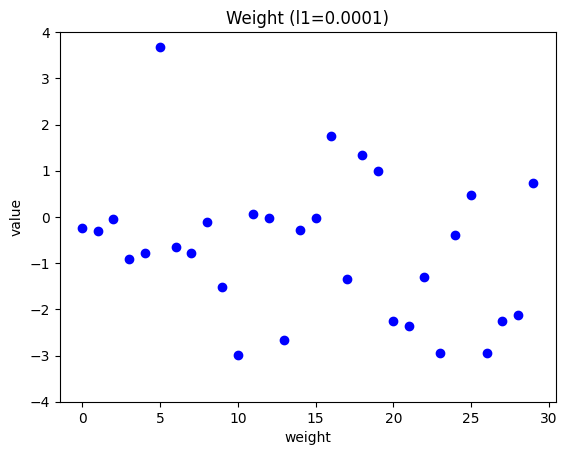

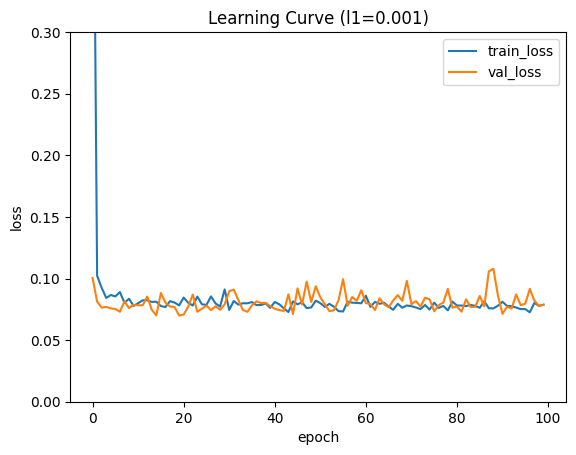

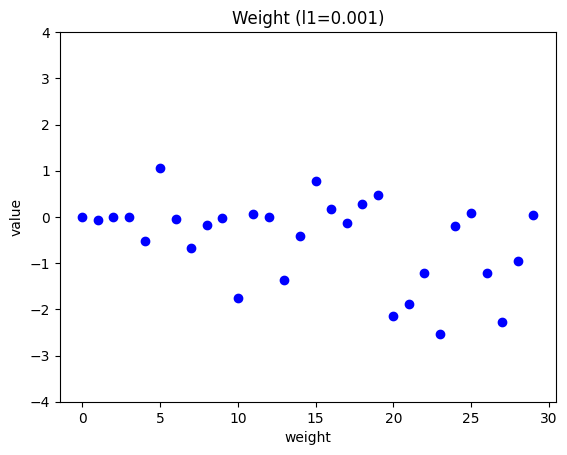

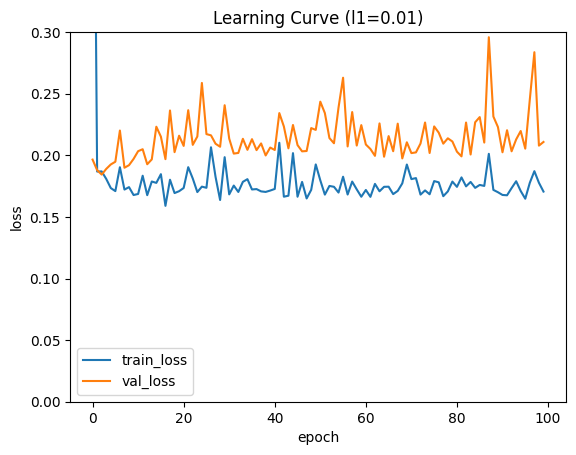

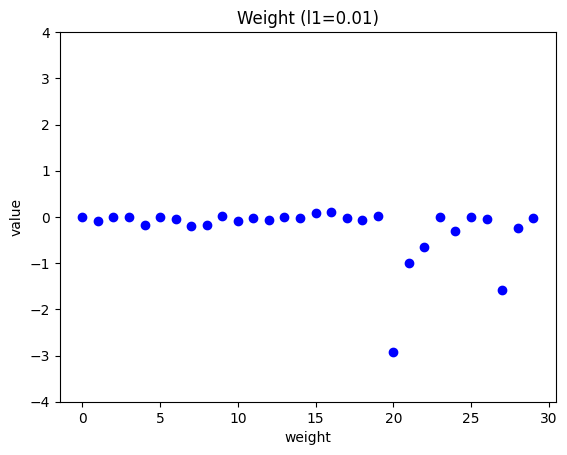

In [ ]:
# L1 규제 적용

l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer3(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()

    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [ ]:
layer5 = SingleLayer3(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

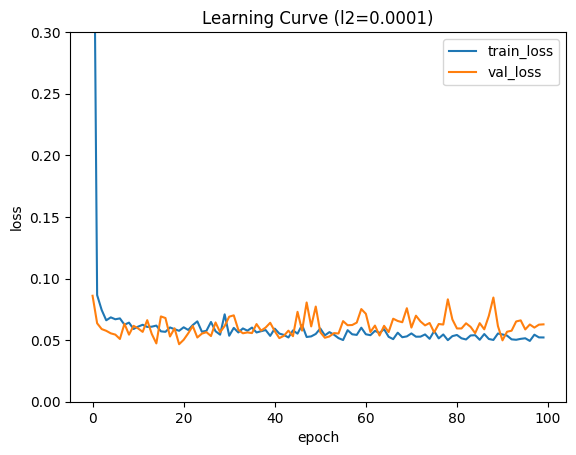

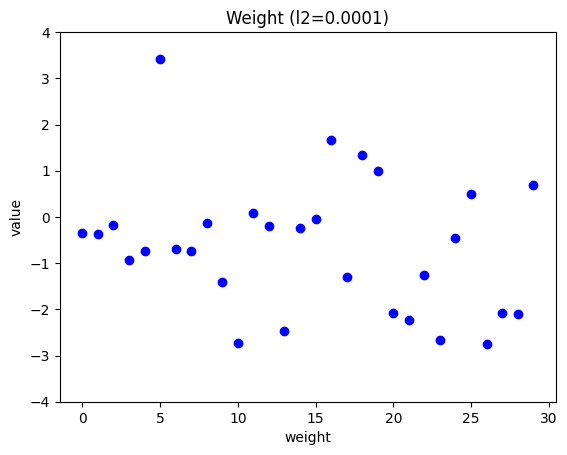

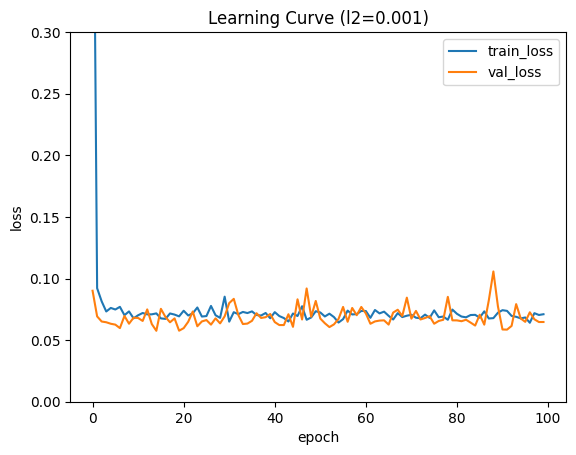

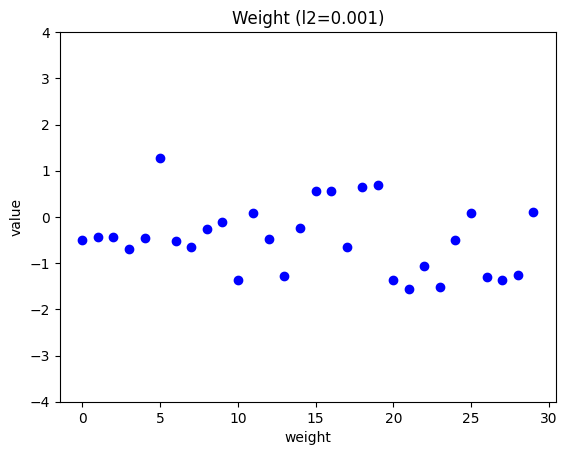

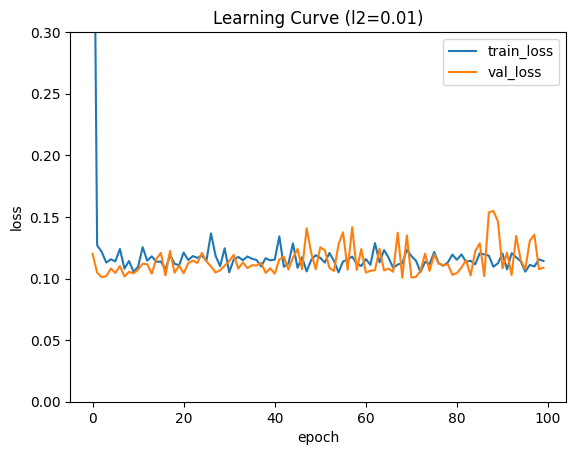

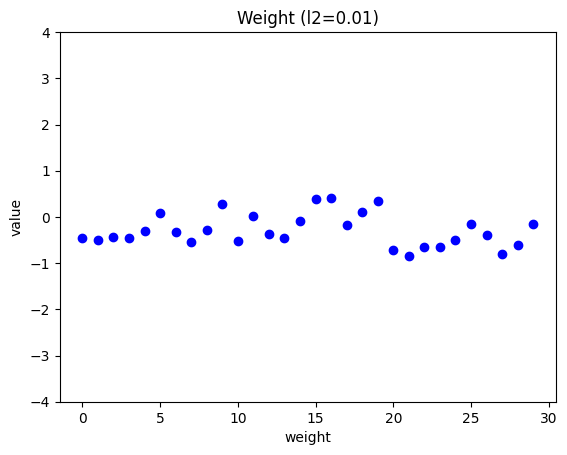

In [ ]:
# L2 규제 적용

l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer3(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()

    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

In [ ]:
layer6 = SingleLayer3(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [ ]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

In [ ]:
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

# sklearn을 활용한 교차 검증

In [ ]:
validation_scores = []  # 각 폴드의 검증 점수 저장

# 폴드의 개수를 지정
k = 10

# 전체 훈련 데이터(테스트 데이터 제외)를 k로 나눔 -> 한 폴드에 들어갈 샘플 개수
bins = len(x_train_all) // k

print(bins)   # bins의 크기

45


In [ ]:
for i in range(k):
    start = i*bins # 검증 폴드의 시작 위치
    end = (i+1)*bins # 검증 폴드의 끝 위치
    val_fold = x_train_all[start:end] # 폴드의 시작과 끝 위치의 훈련 데이터를 검증 폴더로 지정
    val_target = y_train_all[start:end] # 폴드의 시작과 끝 위치의 훈련 타겟을 검증 타겟으로 지정

    train_index = list(range(0, start))+list(range(end, len(x_train_all)))
    train_fold = x_train_all[train_index] # 검증 폴드를 제외한 훈련 데이터 지정
    train_target = y_train_all[train_index] # 검증 타겟을 제외한 훈련 타겟 지정

    # 훈련 데이터와 검증 데이터의 스케일링
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_scaled = (val_fold - train_mean) / train_std

    # L2 규제 적용
    lyr = SingleLayer3(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)

print(np.mean(validation_scores))

0.9711111111111113


In [ ]:
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


In [ ]:
type(scores)

dict

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


In [ ]:
print(np.mean(scores['train_score']))

0.9875478561631581
